## Original Code

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from random import seed, randint
import numpy as np

In [ ]:
# reading dataset
(X_tr, y_tr), (X_ts, y_ts) = fashion_mnist.load_data()

# shapes of data structures
print('tamaños conjunto de entrenamiento X:', X_tr.shape, '  Y:', y_tr.shape)
print('tamaños conjunto de validación X:', X_ts.shape, '  Y:', y_ts.shape )

4422102/4422102 [==============================] - 1s 0us/step
tamaños conjunto de entrenamiento X: (60000, 28, 28)   Y: (60000,)
tamaños conjunto de validación X: (10000, 28, 28)   Y: (10000,)


In [ ]:
# image domain
print(np.min(X_tr), np.max(X_tr))
print(np.min(y_tr), np.max(y_tr))

0 255
0 9


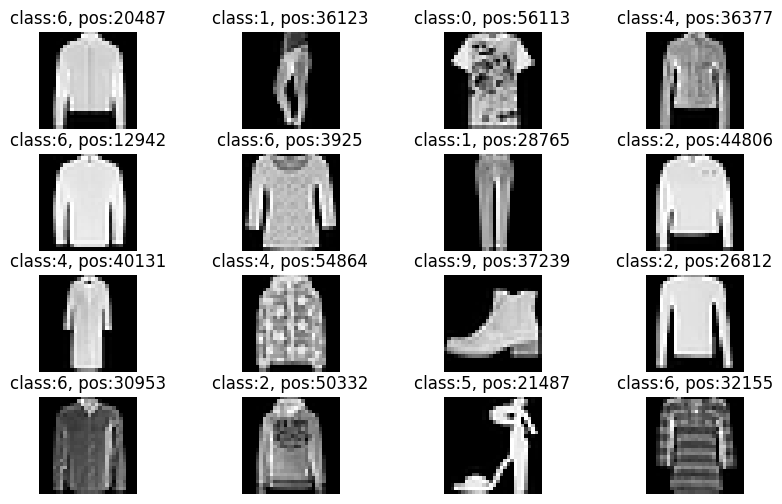

In [ ]:
# viewing randomly chosen images

plt.figure(1, figsize=(10,6))
plt.subplots_adjust(hspace=0.25) #, wspace=3)
for i in range(16):
    plt.subplot(4, 4, i+1)
    # plt.tight_layout()
    j = randint(0, y_tr.shape[0]-1)
    plt.imshow(X_tr[j], cmap='gray', interpolation='none')
    plt.title('class:{}, pos:{}'.format(y_tr[j], j))
    plt.axis("off")
plt.show()

In [ ]:
# preprocessing data

num_classes=10

# images are flattened (28x28=784)
X_tr = X_tr.reshape(60000, 784).astype('float64')
X_ts = X_ts.reshape(10000, 784).astype('float64')

# image normalization from [0..255] to [0..1]
X_tr /= 255
X_ts /= 255

# re-labeling images with one-hot vectors [0,0,1,0,...]
y_tr_original = y_tr
y_ts_original = y_ts
y_tr = keras.utils.to_categorical(y_tr, num_classes)
y_ts = keras.utils.to_categorical(y_ts, num_classes)

# example of correspondence between original label and its one-hot vector
id_sample = randint(0, y_tr.shape[0]-1)
print('sample: {}, class: {}'.format(id_sample, y_tr_original[id_sample]))
print('sample: {}, hot vector: '.format(id_sample), y_tr[id_sample], '\n')

# new shapes of data structures
print('tamaños conjunto de entrenamiento X:', X_tr.shape, '  Y:', y_tr.shape)
print('tamaños conjunto de validación X:', X_ts.shape, '  Y:', y_ts.shape )

sample: 13946, class: 2
sample: 13946, hot vector:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 

tamaños conjunto de entrenamiento X: (60000, 784)   Y: (60000, 10)
tamaños conjunto de validación X: (10000, 784)   Y: (10000, 10)


In [ ]:
# classification model: input layer + 3 hidden layers + output layers

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 59210 (231.29 KB)
Trainable params: 59210 (231.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
import time
import math

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.5, random_state=1, stratify=y_tr)

# hyperparameters
batch_size = 100
epochs = 20
opt=SGD(learning_rate=0.01, momentum=0.9)

# model setting
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# model training
best_model_file = 'best_fcn_digits'
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = best_model_file,
    save_weights_only = True,
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True,
    save_freq='epoch'
)

start_time = time.time()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val), callbacks=[model_checkpoint])
print('Tiempo: {0:.2f} min'.format((time.time()-start_time)/60))

Epoch 1/20
300/300 [==============================] - 10s 13ms/step - loss: 0.8425 - accuracy: 0.6937 - val_loss: 0.5532 - val_accuracy: 0.8104
Epoch 2/20
300/300 [==============================] - 2s 8ms/step - loss: 0.5011 - accuracy: 0.8209 - val_loss: 0.4831 - val_accuracy: 0.8243
Epoch 3/20
300/300 [==============================] - 2s 6ms/step - loss: 0.4423 - accuracy: 0.8403 - val_loss: 0.4224 - val_accuracy: 0.8466
Epoch 4/20
300/300 [==============================] - 2s 6ms/step - loss: 0.4132 - accuracy: 0.8499 - val_loss: 0.4040 - val_accuracy: 0.8542
Epoch 5/20
300/300 [==============================] - 2s 8ms/step - loss: 0.3890 - accuracy: 0.8571 - val_loss: 0.3775 - val_accuracy: 0.8636
Epoch 6/20
300/300 [==============================] - 3s 10ms/step - loss: 0.3638 - accuracy: 0.8671 - val_loss: 0.3979 - val_accuracy: 0.8586
Epoch 7/20
300/300 [==============================] - 4s 12ms/step - loss: 0.3505 - accuracy: 0.8716 - val_loss: 0.3669 - val_accuracy: 0.8686
Ep

In [ ]:
# recovering the best model
model.load_weights(best_model_file)

train_results = model.evaluate(X_train, y_train, verbose=0)
print('Loss on training data: {:.4f}'.format(train_results[0]))
print('Accuracy on training data: {:.4f}\n'.format(train_results[1]))

test_results = model.evaluate(X_ts, y_ts, verbose=0)
print('Loss on test data: {0:.4f}'.format(test_results[0]))
print('Accuracy on test data: {0:.4f}\n'.format(test_results[1]))

Loss on training data: 0.2476
Accuracy on training data: 0.9103

Loss on test data: 0.3656
Accuracy on test data: 0.8714



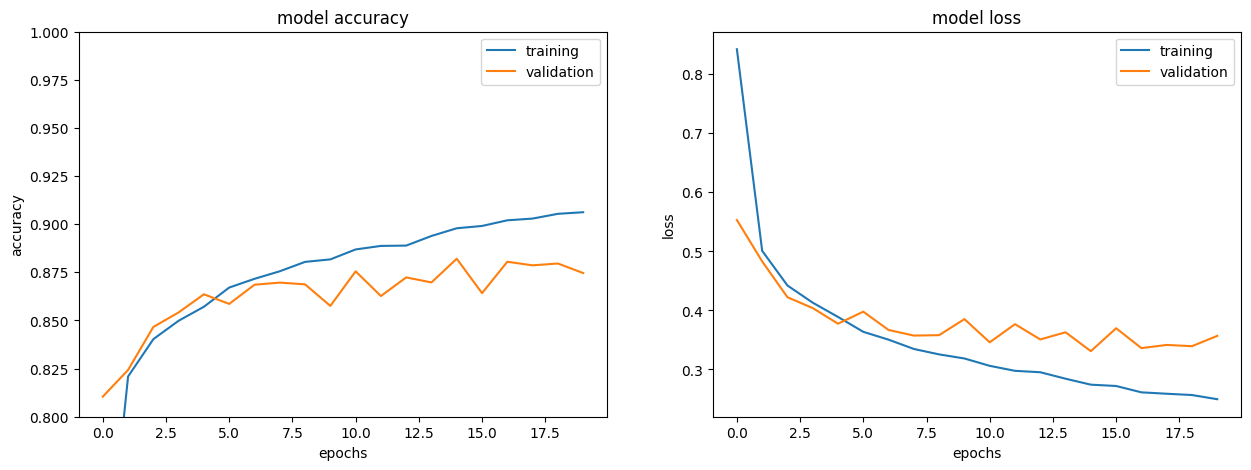

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='training')
ax[0].plot(history.history['val_accuracy'], label='validation')
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylim(0.8, 1)
ax[0].legend()
plt.legend(['train', 'test'], loc='upper left')
ax[1].plot(history.history['loss'], label='training')
ax[1].plot(history.history['val_loss'], label='validation')
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epochs')
ax[1].legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# confusion matrix of test data
test_probabilities = model.predict(X_ts)
print(test_probabilities.shape)

test_predictions = np.argmax(test_probabilities, axis=1)
print(test_predictions.shape)

print('\nClass sizes:\n', [np.sum(y_ts_original==i) for i in range(10)])
print('\nConfusion matrix:\n', confusion_matrix(y_ts_original, test_predictions))

313/313 [==============================] - 1s 2ms/step
(10000, 10)
(10000,)

Class sizes:
 [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

Confusion matrix:
 [[813   0  13  38   4   3 114   0  15   0]
 [  3 961   1  27   4   1   3   0   0   0]
 [ 22   2 789  18  95   2  68   0   4   0]
 [ 22   6   8 892  39   0  27   0   6   0]
 [  0   1 116  33 797   0  48   0   5   0]
 [  0   0   0   1   0 958   0  23   0  18]
 [119   1  97  36  90   0 645   0  12   0]
 [  0   0   0   0   0  31   0 944   0  25]
 [  5   1   3   8   4   4   8   6 961   0]
 [  0   0   0   0   0   6   1  39   0 954]]


In [ ]:
# looking into classifier errors

target_label = 0
pred_label = 6
target_indexes = np.asarray(y_ts_original==target_label).nonzero()
print(np.asarray(target_indexes).shape)
prediction_indexes = np.asarray(test_predictions==pred_label).nonzero()
print(np.asarray(prediction_indexes).shape)
errors = np.intersect1d(target_indexes, prediction_indexes)
print(errors.size, errors)

(1, 1000)
(1, 914)
114 [ 141  332  359  381  577  681  703  926  937  965  985 1000 1124 1139
 1158 1231 1249 1305 1399 1495 1572 1686 1836 1861 1905 2099 2355 2479
 2506 2522 2571 2653 2713 2717 2832 2909 3074 3236 3244 3332 3485 3540
 3575 3747 3776 3789 3819 3917 3938 3954 4067 4143 4213 4224 4381 4460
 4539 4897 4917 4924 4965 4998 5028 5032 5086 5119 5144 5307 5349 5435
 5601 5659 5672 5808 5943 5968 6094 6225 6416 6485 6542 6679 6688 6742
 6758 6926 7137 7599 7818 7822 7831 8007 8059 8128 8348 8425 8454 8649
 8695 8717 8782 8832 8999 9114 9251 9291 9349 9446 9571 9577 9599 9668
 9791 9902]


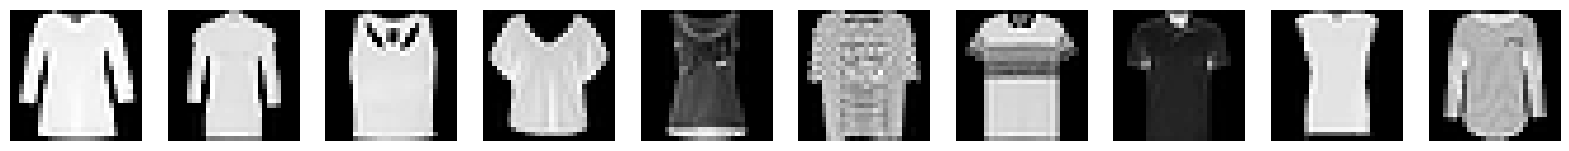

In [ ]:
# displaying a number of model errors

plt.figure(2, figsize=(20,6))
plt.subplots_adjust(hspace=0.25) #, wspace=3)
n = min(errors.size,10)
for i in range(n):
    plt.subplot(1, n, i+1)
    j = errors[i]
    plt.imshow(X_ts[j].reshape((28,28)), cmap='gray', interpolation='none')
    plt.axis("off")
plt.show()

# Code for the deriverable

In [ ]:
# classification model: input layer + n hidden layers + output layers
def build_model(hidden_layers, layers_size):
  model = Sequential() # Initialize layer
  for i in range(hidden_layers): # Hidden layers
    if i == 0:
      model.add(Dense(layers_size, activation='relu', input_shape=(784,)))
    else:
      model.add(Dense(layers_size, activation='relu'))

  model.add(Dense(num_classes, activation='softmax')) # Output layer

  # model summary
  model.summary()
  return model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from hyperopt import fmin, tpe, hp, STATUS_OK, space_eval
import time
import math
import numpy as np
# Function to do the training
def do_training(X_training, y_training, y_tr_original, X_test, y_test_original):

  def hyperopt_train_test(params):
    # Get the hyperparameters
    # Hidden layer parameter
    model = build_model(params['num_layers'], params['layer_size'])
    # Learning rate parameter
    opt=SGD(learning_rate=params['learning_rate'], momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # Batch size parameter
    batch_size = params['batch_size']
    # epochs for the search
    epochs = 1

    # model training
    best_model_file = 'best_fcn_digits'
    model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath = best_model_file,
        save_weights_only = True,
        monitor = 'val_loss',
        mode = 'min',
        save_best_only = True,
        save_freq='epoch'
    )

    # Implement the KFold cross validation
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    cv_scores = []
    for train_index, test_index in kfold.split(X_training, y_tr_original):
      # Fit the model
      history = model.fit(X_training[train_index], y_training[train_index], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_training[test_index], y_training[test_index]), callbacks=[model_checkpoint])

      # Evaluate the model over the same validation data, not the best
      scores = model.evaluate(X_training[test_index], y_training[test_index])
      cv_scores.append(scores[-1]) # Store the higher score
    return np.mean(cv_scores) # Return the mean of the scores

  def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

  # Dataset splitting
  X_tr, X_va, y_tr, y_va = train_test_split(X_training, y_training, test_size=0.5, random_state=1, stratify=y_training)

  # Hyperopt space
  hp_domains = {
      'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.1)),
      'batch_size' : hp.choice('batch_size',[50,100,200]),
      'layer_size' : hp.choice('layer_size',[32,64,128]),
      'num_layers' : hp.choice('num_layers',[2,3,4])
  }
  # Find best hyperparameters
  best_hp = fmin(f, hp_domains, algo=tpe.suggest, max_evals=50)
  eval = space_eval(hp_domains, best_hp)
  return eval

In [ ]:
# Search for the best hyper parameters
best_hp = do_training(X_tr, y_tr, y_tr_original, X_ts, y_ts_original)

Streaming output truncated to the last 5000 lines.
960/960 [==============================] - 7s 7ms/step - loss: 0.3843 - accuracy: 0.8596 - val_loss: 0.3781 - val_accuracy: 0.8633

375/375 [==============================] - 2s 4ms/step - loss: 0.3781 - accuracy: 0.8633

960/960 [==============================] - 6s 6ms/step - loss: 0.3561 - accuracy: 0.8677 - val_loss: 0.3323 - val_accuracy: 0.8790

375/375 [==============================] - 2s 5ms/step - loss: 0.3323 - accuracy: 0.8790

960/960 [==============================] - 6s 6ms/step - loss: 0.3377 - accuracy: 0.8756 - val_loss: 0.3303 - val_accuracy: 0.8770

375/375 [==============================] - 2s 4ms/step - loss: 0.3303 - accuracy: 0.8770

Model: "sequential_43"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense_177 (Dense)           (None, 32)                25120     

 dense_178 (Dense)           (None, 32)                10

In [ ]:
# Best hyperparameters
num_layers = best_hp['num_layers']
layer_size = best_hp['layer_size']
batch_size = best_hp['batch_size']
learning_rate = best_hp['learning_rate']

print('Best Hyperparameters')
print(f'num layers: {num_layers}')
print(f'layer_size: {layer_size}')
print(f'batch_size: {batch_size}')
print(f'learning_rate: {learning_rate}')

Best Hyperparameters
num layers: 2
layer_size: 128
batch_size: 50
learning_rate: 0.014700101146139798


In [ ]:
# Dataset splitting
X_tr, X_va, y_tr, y_va = train_test_split(X_tr, y_tr, test_size=0.5, random_state=1, stratify=y_tr)

# Hyper parameters
epochs = 20

# model setting
opt=SGD(learning_rate=learning_rate, momentum=0.9)
model = build_model(num_layers, layer_size)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# model training
best_model_file = 'best_fcn_digits'
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = best_model_file,
    save_weights_only = True,
    monitor = 'val_loss',
    mode = 'min',
    save_best_only = True,
    save_freq='epoch'
)

start_time = time.time()
history = model.fit(X_tr, y_tr, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_va, y_va), callbacks=[model_checkpoint])
print('Tiempo: {0:.2f} min'.format((time.time()-start_time)/60))

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_205 (Dense)           (None, 128)               100480    
                                                                 
 dense_206 (Dense)           (None, 128)               16512     
                                                                 
 dense_207 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.6346 - accuracy: 0.7728 - val_loss: 0.4720 - val_accuracy: 0.8326
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.4335 - accuracy: 0.8420 - val_loss: 0.4120 - val_accuracy: 

In [ ]:
# recovering the best model
model.load_weights(best_model_file)

train_results = model.evaluate(X_tr, y_tr, verbose=0)
print('Loss on training data: {:.4f}'.format(train_results[0]))
print('Accuracy on training data: {:.4f}\n'.format(train_results[1]))

test_results = model.evaluate(X_ts, y_ts, verbose=0)
print('Loss on test data: {0:.4f}'.format(test_results[0]))
print('Accuracy on test data: {0:.4f}\n'.format(test_results[1]))

Loss on training data: 0.2107
Accuracy on training data: 0.9192

Loss on test data: 0.3577
Accuracy on test data: 0.8754



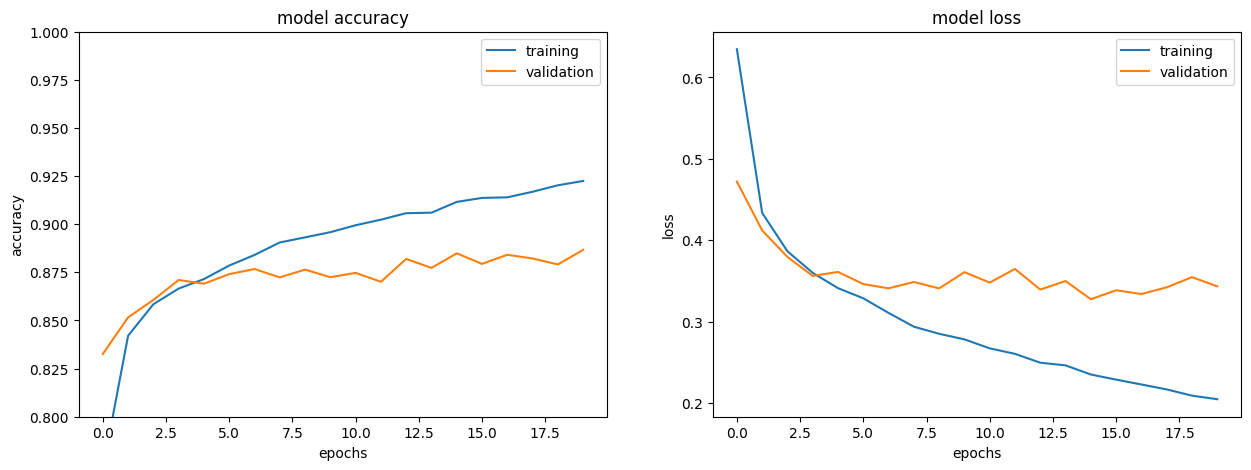

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='training')
ax[0].plot(history.history['val_accuracy'], label='validation')
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylim(0.8, 1)
ax[0].legend()
plt.legend(['train', 'test'], loc='upper left')
ax[1].plot(history.history['loss'], label='training')
ax[1].plot(history.history['val_loss'], label='validation')
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epochs')
ax[1].legend()
plt.show()

In [ ]:
# confusion matrix of test data
test_probabilities = model.predict(X_ts)
print(test_probabilities.shape)

test_predictions = np.argmax(test_probabilities, axis=1)
print(test_predictions.shape)

print('\nClass sizes:\n', [np.sum(y_ts_original==i) for i in range(10)])
print('\nConfusion matrix:\n', confusion_matrix(y_ts_original, test_predictions))

313/313 [==============================] - 1s 3ms/step
(10000, 10)
(10000,)

Class sizes:
 [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

Confusion matrix:
 [[825   0  19  16   6   1 127   0   6   0]
 [  5 961   4  19   6   0   5   0   0   0]
 [ 18   0 771   7 114   0  89   0   1   0]
 [ 28   9  15 875  36   0  35   0   2   0]
 [  0   0  78  33 810   0  78   0   1   0]
 [  0   0   0   1   0 967   0  15   0  17]
 [108   0  78  22  65   0 724   0   3   0]
 [  0   0   0   0   0  33   0 928   1  38]
 [ 15   0   9   2  11   4  21   4 934   0]
 [  1   0   0   0   0  12   0  28   0 959]]


In [ ]:
# looking into classifier errors

target_label = 6
pred_label = 0
target_indexes = np.asarray(y_ts_original==target_label).nonzero()
print(np.asarray(target_indexes).shape)
prediction_indexes = np.asarray(test_predictions==pred_label).nonzero()
print(np.asarray(prediction_indexes).shape)
errors = np.intersect1d(target_indexes, prediction_indexes)
print(errors.size, errors)

(1, 1000)
(1, 1000)
108 [  40  474  563  572  971 1152 1210 1396 1458 1620 1771 1943 2006 2247
 2397 2417 2431 2464 2580 2629 2840 2856 2986 3080 3232 3239 3323 3327
 3625 3700 4019 4082 4109 4127 4140 4153 4192 4194 4231 4280 4365 4451
 4692 4727 4758 4803 4886 4893 5266 5442 5504 5522 5566 5654 5695 5806
 6008 6020 6023 6024 6159 6169 6258 6344 6558 6655 6770 6797 6958 6996
 7025 7112 7189 7195 7244 7334 7416 7581 7719 7778 7800 7829 7863 7924
 7959 8179 8237 8353 8360 8538 8592 8617 8658 8664 8745 8939 8997 9091
 9122 9133 9183 9211 9297 9573 9602 9955 9977 9979]


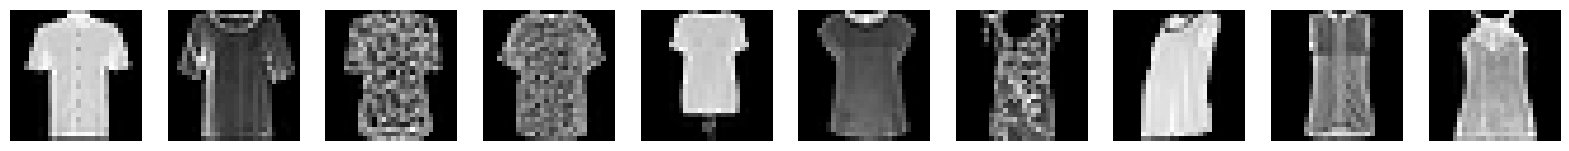

In [ ]:
# displaying a number of model errors

plt.figure(2, figsize=(20,6))
plt.subplots_adjust(hspace=0.25) #, wspace=3)
n = min(errors.size,10)
for i in range(n):
    plt.subplot(1, n, i+1)
    j = errors[i]
    plt.imshow(X_ts[j].reshape((28,28)), cmap='gray', interpolation='none')
    plt.axis("off")
plt.show()

## Conclussions

### Models sumary
Hyper parameters:

|        |num_layers|layer_size|batch_size|learning_rate|
|--------|----------|----------|----------|-------------|
|Original| 3        | 64       | 100      | 0.01        |
|Hyperopt| 2        | 128      | 50       | 0.0147      |

<br>Results on training data:

|        | Loss     | Accuracy |
|--------|----------|----------|
|Original| 0.2476   | 0.9103   |
|Hyperopt| 0.2107   | 0.9192   |

<br>Results on test data:

|        | Loss     | Accuracy |
|--------|----------|----------|
|Original| 0.3656   | 0.8714   |
|Hyperopt| 0.3577   | 0.8754   |


___
### Conclussions

For our Hyperparameters optimization we have decided to implement the K-fold cross validation dividing the set in k=5. This way we can make sure that the parameters we are selecting are the ones that work best in a bigger number of scenarios, and not just taking the values that would work best for our dataset, which might lead to overfitting.

<br>From the results we cannot get any conclussions even though the model with the optimized hyperparameters has perfommed slighly better, the difference is too small. Maybe a more exaustive search, maybe with a 100 evaluations and a k=10 the difference in the results might have been more substantial.

<br> As for the hyper parameter selected in the space search, we see that specifically the learning rate is basically the same. The bigger difference comes in the hyperopt we have two layers of 128 instead of three of 64. A higher numer of neurons will help the model learn more intricate and complex patterns, which for the case of this specific task might help more than having having a bigger number of layers. As for the batch size, the hyperopt has decided to use 50 batches, which makes the training slower, but it helps us prevent overfitting on the training data.

<br> From the training graphs of the two models, we can appreciate how, the hyperopt model starts with a lower loss value and higher accuracy value which makes us think that this paremeters are performing better, but by the end of the training the original and the hyperopt model have finished in very similar results.

<br> It would have been interesting to see the two models perform over a 100 iterations and see the consistency, but due to time contrains it has not been possible.